## Detect Rambu
This is the 2nd file of myproject Indonesia Traffic Sign Detection. Please see my 1st file which is "detect rambu - EDA.ipynb". Object detection is a computer technology related to computer vision and image processing that deals with detecting instances of semantic objects of a certain class (such as humans, buildings, or cars) in digital images and videos. The goal of my current project is to detect "rambu" from a collection of images and videos and then create a bounding box to state where the object is located. I am using Yolov8 as model architecture with ultralytics library. Dataset obtained from paper "Implementasi Deep Learning untuk Object Detection Menggunakan Algoritma YOLO (You Only Look Once) pada Rambu Lalu Lintas di Indonesia" by Adhy Wiranto Sudjana. Please see my 1st file to collect dataset and EDA.

### 1. Install and import ultralytics library first

In [1]:
pip show ultralytics

Name: ultralyticsNote: you may need to restart the kernel to use updated packages.

Version: 8.3.49


--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\nanan\anaconda3\Lib\site-packages\pip\_internal\utils\logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "C:\Users\nanan\anaconda3\Lib\site-packages\pip\_vendor\rich\console.py", line 1672, in print
    with self:
  File "C:\Users\nanan\anaconda3\Lib\site-packages\pip\_vendor\rich\console.py", line 864, in __exit__
    self._exit_buffer()
  File "C:\Users\nanan\anaconda3\Lib\site-packages\pip\_vendor\rich\console.py", line 822, in _exit_buffer
    self._check_buffer()
  File "C:\Users\nanan\anaconda3\Lib\site-packages\pip\_vendor\rich\console.py", line 2027, in _check_buffer
    legacy_windows_render(buffer, LegacyWindowsTerm(self.file))
  File "C:\Users\nanan\anaconda3\Lib\site-packages\pip\_vendor\rich\_windows_renderer.py", line 19, in legacy_windows_render
    term.write_text(text)
  File "C:\Users\nanan\anaconda3\Lib\site-packages\pip\_vendor\

In [3]:
import matplotlib.pyplot as plt
from ultralytics import YOLO
%matplotlib agg

print("Matplotlib backend:", plt.get_backend())
print("Ultralytics YOLO version loaded successfully.")

Matplotlib backend: agg
Ultralytics YOLO version loaded successfully.


In [5]:
from ultralytics import YOLO
import os
import glob
from IPython.display import Image, display, clear_output
import IPython.display as ipd
%matplotlib agg

clear_output()
ipd.display("output")
print("Matplotlib backend:", plt.get_backend())
print("Ultralytics YOLO version loaded successfully.")

!yolo checks

'output'

Matplotlib backend: agg
Ultralytics YOLO version loaded successfully.


Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\nanan\AppData\Local\Programs\Python\Python312\Scripts\yolo.exe\__main__.py", line 4, in <module>
  File "C:\Users\nanan\AppData\Local\Programs\Python\Python312\Lib\site-packages\ultralytics\__init__.py", line 11, in <module>
    from ultralytics.models import NAS, RTDETR, SAM, YOLO, FastSAM, YOLOWorld
  File "C:\Users\nanan\AppData\Local\Programs\Python\Python312\Lib\site-packages\ultralytics\models\__init__.py", line 3, in <module>
    from .fastsam import FastSAM
  File "C:\Users\nanan\AppData\Local\Programs\Python\Python312\Lib\site-packages\ultralytics\models\fastsam\__init__.py", line 3, in <module>
    from .model import FastSAM
  File "C:\Users\nanan\AppData\Local\Programs\Python\Python312\Lib\site-packages\ultralytics\models\fastsam\model.py", line 5, in <module>
    from ultralytics.engine.model import Model
  File "C:\Use

### 2. Get the pre-trained Yolov8
URL : https://docs.ultralytics.com/tasks/detect/ <br>
There are several pretrained files for detection. First row is the fastest but the result is not to good. I'm using "yolov8m.pt"<img src="yolo pretrained.png">

In [7]:
!pip show seaborn

Name: seaborn
Version: 0.13.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: C:\Users\nanan\AppData\Local\Programs\Python\Python312\Lib\site-packages
Requires: matplotlib, numpy, pandas
Required-by: ultralytics


In [9]:
import os
os.chdir(".")

In [11]:
%cd "."

C:\bootcamp-detectrambu


In [13]:
import requests

urls = [
    "https://github.com/ultralytics/assets/releases/download/v8.1.0/yolov8m.pt",
    "https://github.com/ultralytics/assets/releases/download/v8.1.0/yolov8n.pt",
    "https://github.com/ultralytics/assets/releases/download/v8.1.0/yolov8s.pt",
    "https://github.com/ultralytics/assets/releases/download/v8.1.0/yolov8l.pt",
    "https://github.com/ultralytics/assets/releases/download/v8.1.0/yolov8x.pt",
    "https://github.com/ultralytics/assets/releases/download/v8.1.0/yolov8m.pt",
]

for url in urls:
    filename = url.split("/")[-1]
    print(f"Downloading {filename}...")
    response = requests.get(url)
    with open(filename, "wb") as f:
        f.write(response.content)
    print(f"{filename} downloaded.")


KeyboardInterrupt: 

### 3. Use yolov8m as pre-trained model

In [13]:
#%cd .
model = YOLO("yolov8m.pt")
import os
print("Current Directory:", os.getcwd())

Current Directory: C:\bootcamp-detectrambu


In [15]:
import os
# Menampilkan semua file dan folder dalam direktori kerja saat ini
print("Files and directories:", os.listdir())


Files and directories: ['.git', '.ipynb_checkpoints', 'bootcamp-detectrambu', 'dataset.yaml', 'detect rambu - webcam v1.py', 'detect_rambu_EDA.ipynb', 'detect_rambu_train.ipynb', 'images', 'labels', 'Livetest Prototype - small.mp4', 'obj', 'README.md', 'runs', 'test', 'yolo11n.pt', 'yolov8l.pt', 'yolov8m.pt', 'yolov8n.pt', 'yolov8s.pt', 'yolov8x.pt']


### 4. Train the dataset with 8 epoch and batch 2

In [17]:
import torch
print("CUDA available:", torch.cuda.is_available())
print("CUDA version:", torch.version.cuda)
print("Number of GPUs:", torch.cuda.device_count())

CUDA available: True
CUDA version: 12.1
Number of GPUs: 1


In [39]:
model.train(data='./dataset.yaml', epochs=8, imgsz=640, device='cpu', batch=2)

Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cu121 CPU (AMD Ryzen 5 5600H with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=yolov8m.pt, data=./dataset.yaml, epochs=8, time=None, patience=100, batch=2, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train12, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_box

train: Scanning C:\bootcamp-detectrambu\labels\train.cache... 1470 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1
val: Scanning C:\bootcamp-detectrambu\labels\train.cache... 1470 images, 0 backgrounds, 0 corrupt: 100%|██████████| 147

Plotting labels to runs\detect\train12\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.0004, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train12
Starting training for 8 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/8         0G     0.8678      1.408      1.198          6        640: 100%|██████████| 735/735 [26:36<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 368/368 [07:

                   all       1470       1603       0.74        0.8      0.847      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/8         0G     0.8492      1.317      1.191          2        640: 100%|██████████| 735/735 [25:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 368/368 [07:

                   all       1470       1603      0.728      0.799      0.822      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/8         0G     0.9126      1.234      1.267          2        640: 100%|██████████| 735/735 [25:14<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 368/368 [07:

                   all       1470       1603      0.785      0.825      0.869      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/8         0G     0.8781      1.149      1.235          4        640: 100%|██████████| 735/735 [25:15<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 368/368 [07:

                   all       1470       1603       0.79      0.856      0.899      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/8         0G      0.854      1.043      1.219          5        640: 100%|██████████| 735/735 [25:15<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 368/368 [07:

                   all       1470       1603      0.871      0.907      0.928       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        6/8         0G     0.8021     0.9292      1.187          6        640: 100%|██████████| 735/735 [25:12<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 368/368 [07:

                   all       1470       1603      0.891      0.931       0.95      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        7/8         0G     0.7677     0.7838      1.153          5        640: 100%|██████████| 735/735 [25:10<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 368/368 [07:

                   all       1470       1603      0.902      0.955      0.947      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        8/8         0G     0.7612     0.7479      1.148          3        640: 100%|██████████| 735/735 [25:08<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 368/368 [07:

                   all       1470       1603      0.932      0.975      0.971      0.819



8 epochs completed in 4.363 hours.
Optimizer stripped from runs\detect\train12\weights\last.pt, 52.0MB
Optimizer stripped from runs\detect\train12\weights\best.pt, 52.0MB

Validating runs\detect\train12\weights\best.pt...
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cu121 CPU (AMD Ryzen 5 5600H with Radeon Graphics)
Model summary (fused): 218 layers, 25,851,919 parameters, 0 gradients, 78.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 368/368 [06:


                   all       1470       1603      0.931      0.975      0.971      0.819
                 derek         70         70      0.931          1      0.993      0.915
     larangan-berhenti         70         70      0.948          1      0.993      0.887
larangan-masuk-bagi-kendaraan-bermotor-dan-tidak-bermotor         70         70      0.959      0.994      0.995      0.892
       larangan-parkir         70        120      0.917      0.967      0.978      0.738
           lampu-hijau         70         71      0.853      0.958       0.93      0.746
          lampu-kuning         70        117      0.922      0.808       0.94      0.645
           lampu-merah         70         70      0.936      0.943      0.976      0.894
  larangan-belok-kanan         70         79       0.95      0.969      0.972      0.863
   larangan-belok-kiri         70         74      0.983          1      0.995       0.82
larangan-berjalan-terus-wajib-berhenti-sesaat         70         70      0.

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001CE02EF66F0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042, 

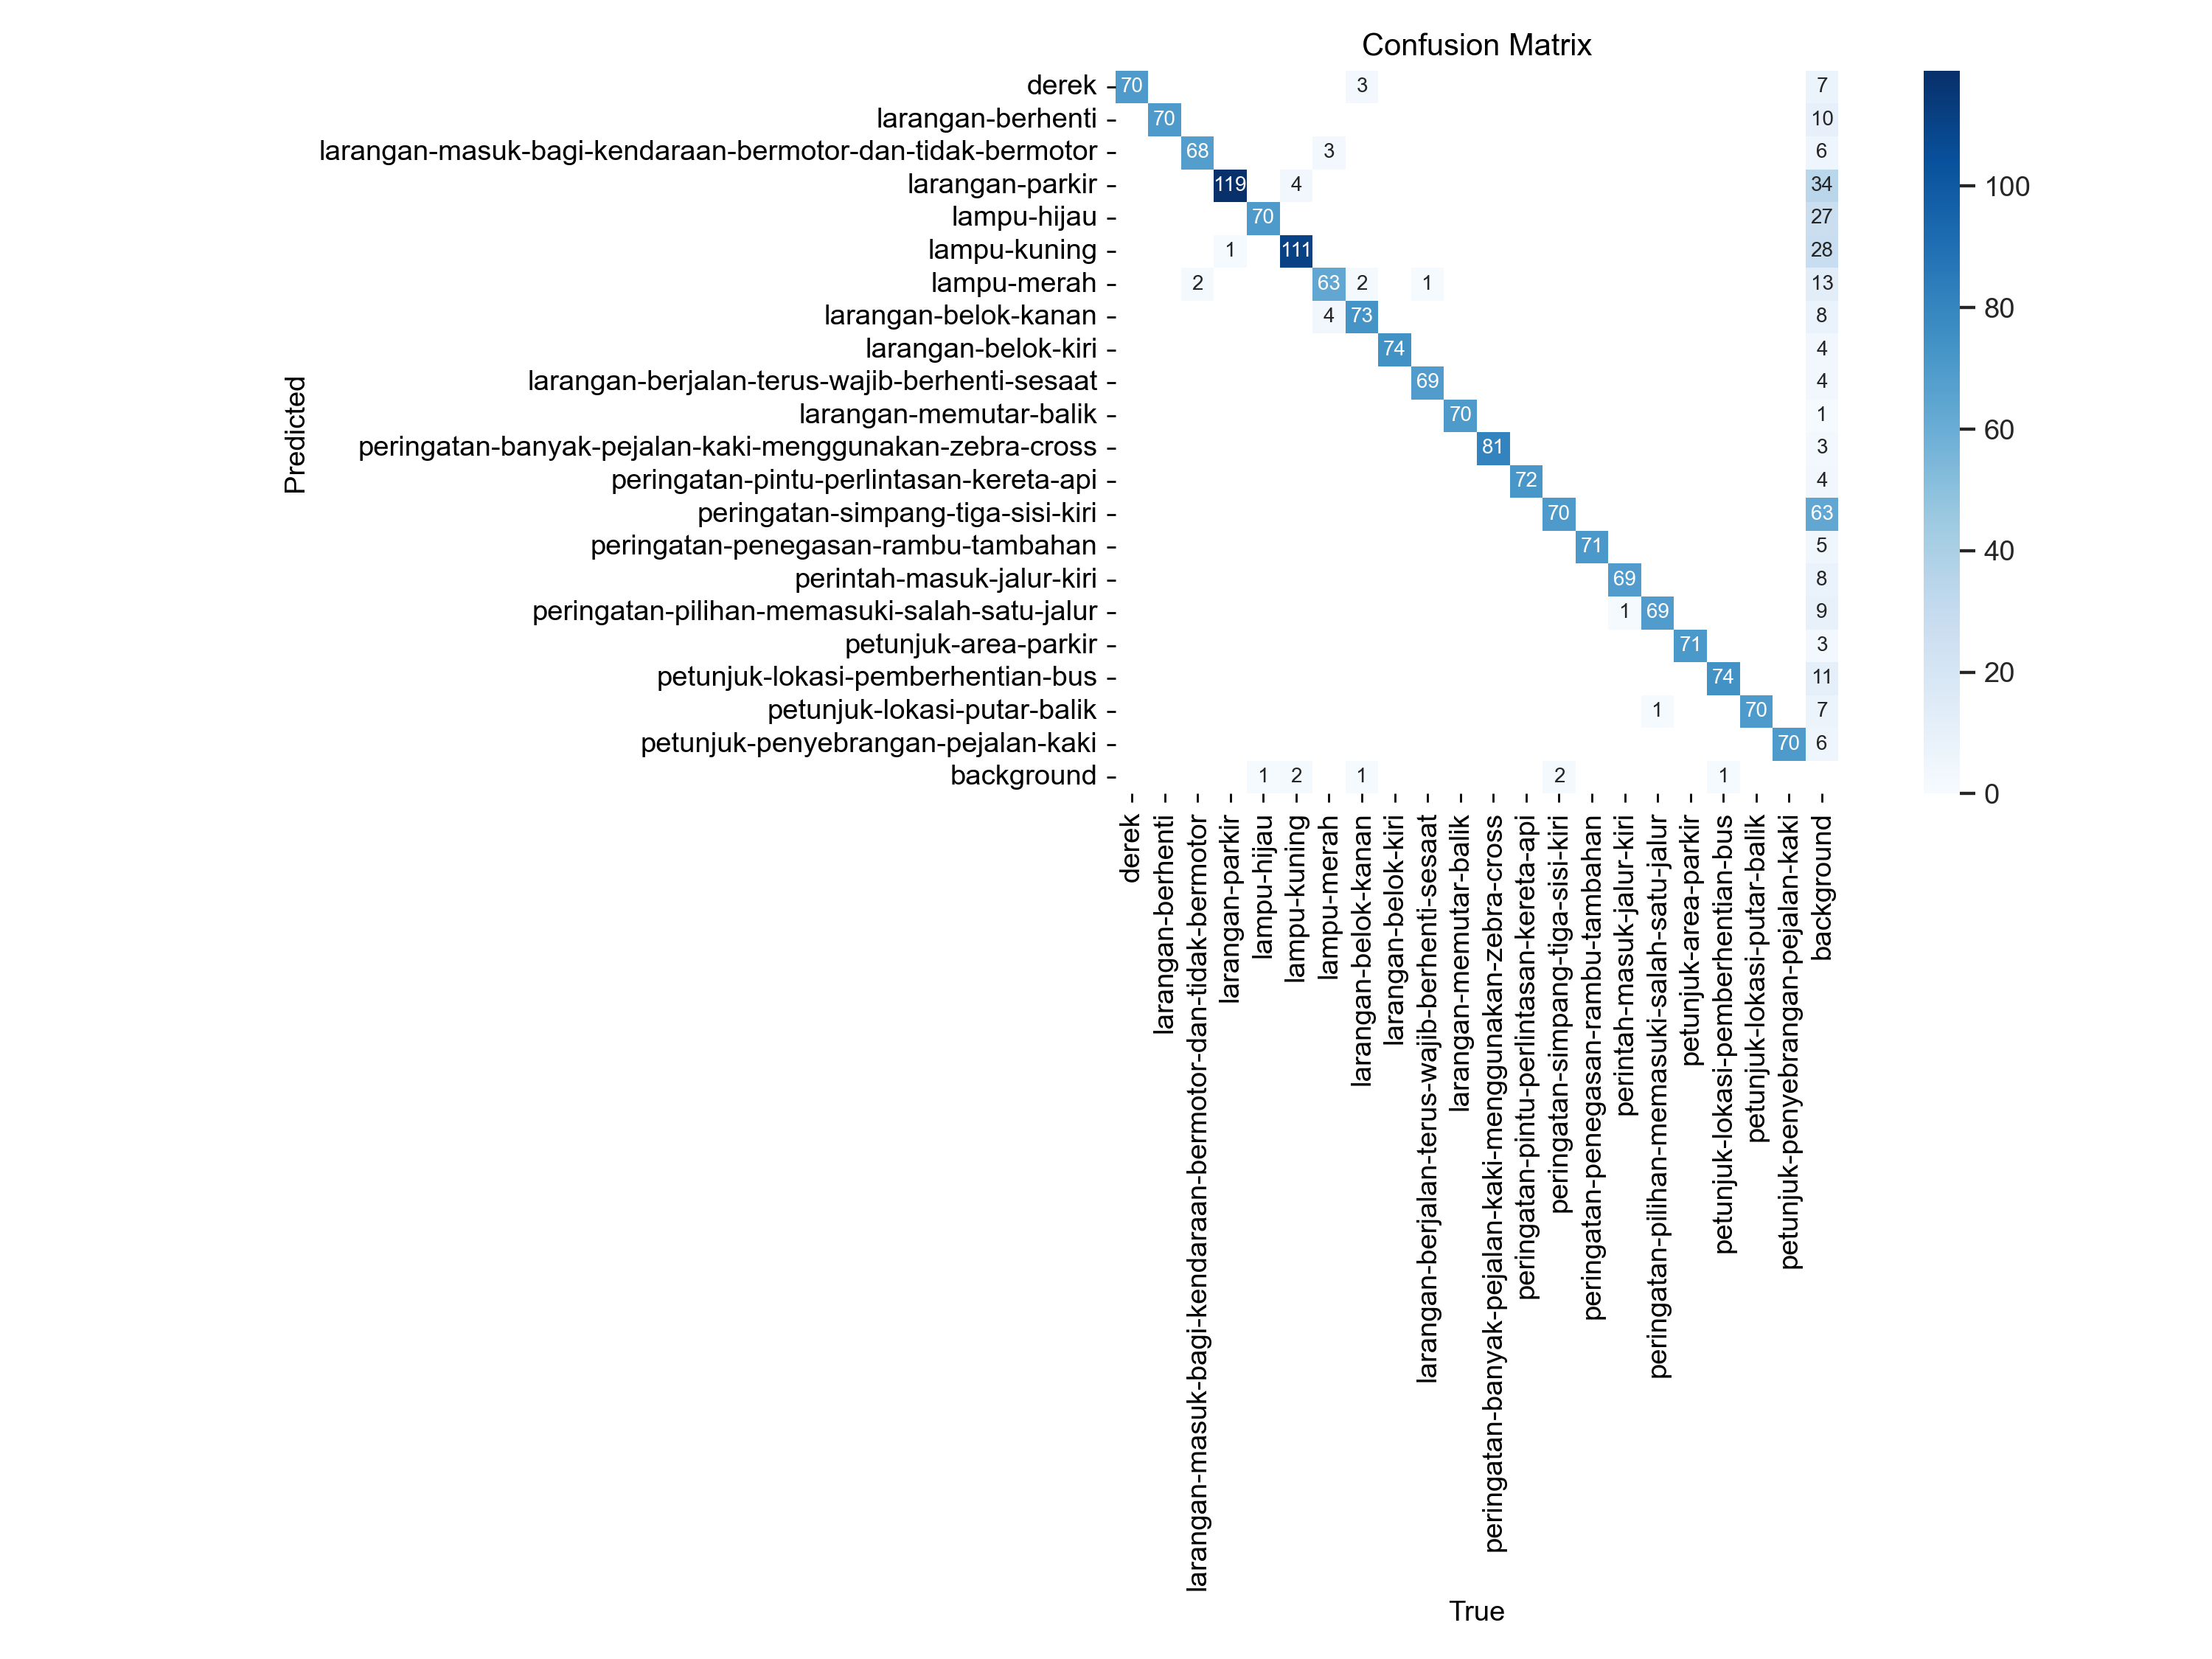

In [49]:
Image(filename='runs/detect/train12/confusion_matrix.png', width=800)

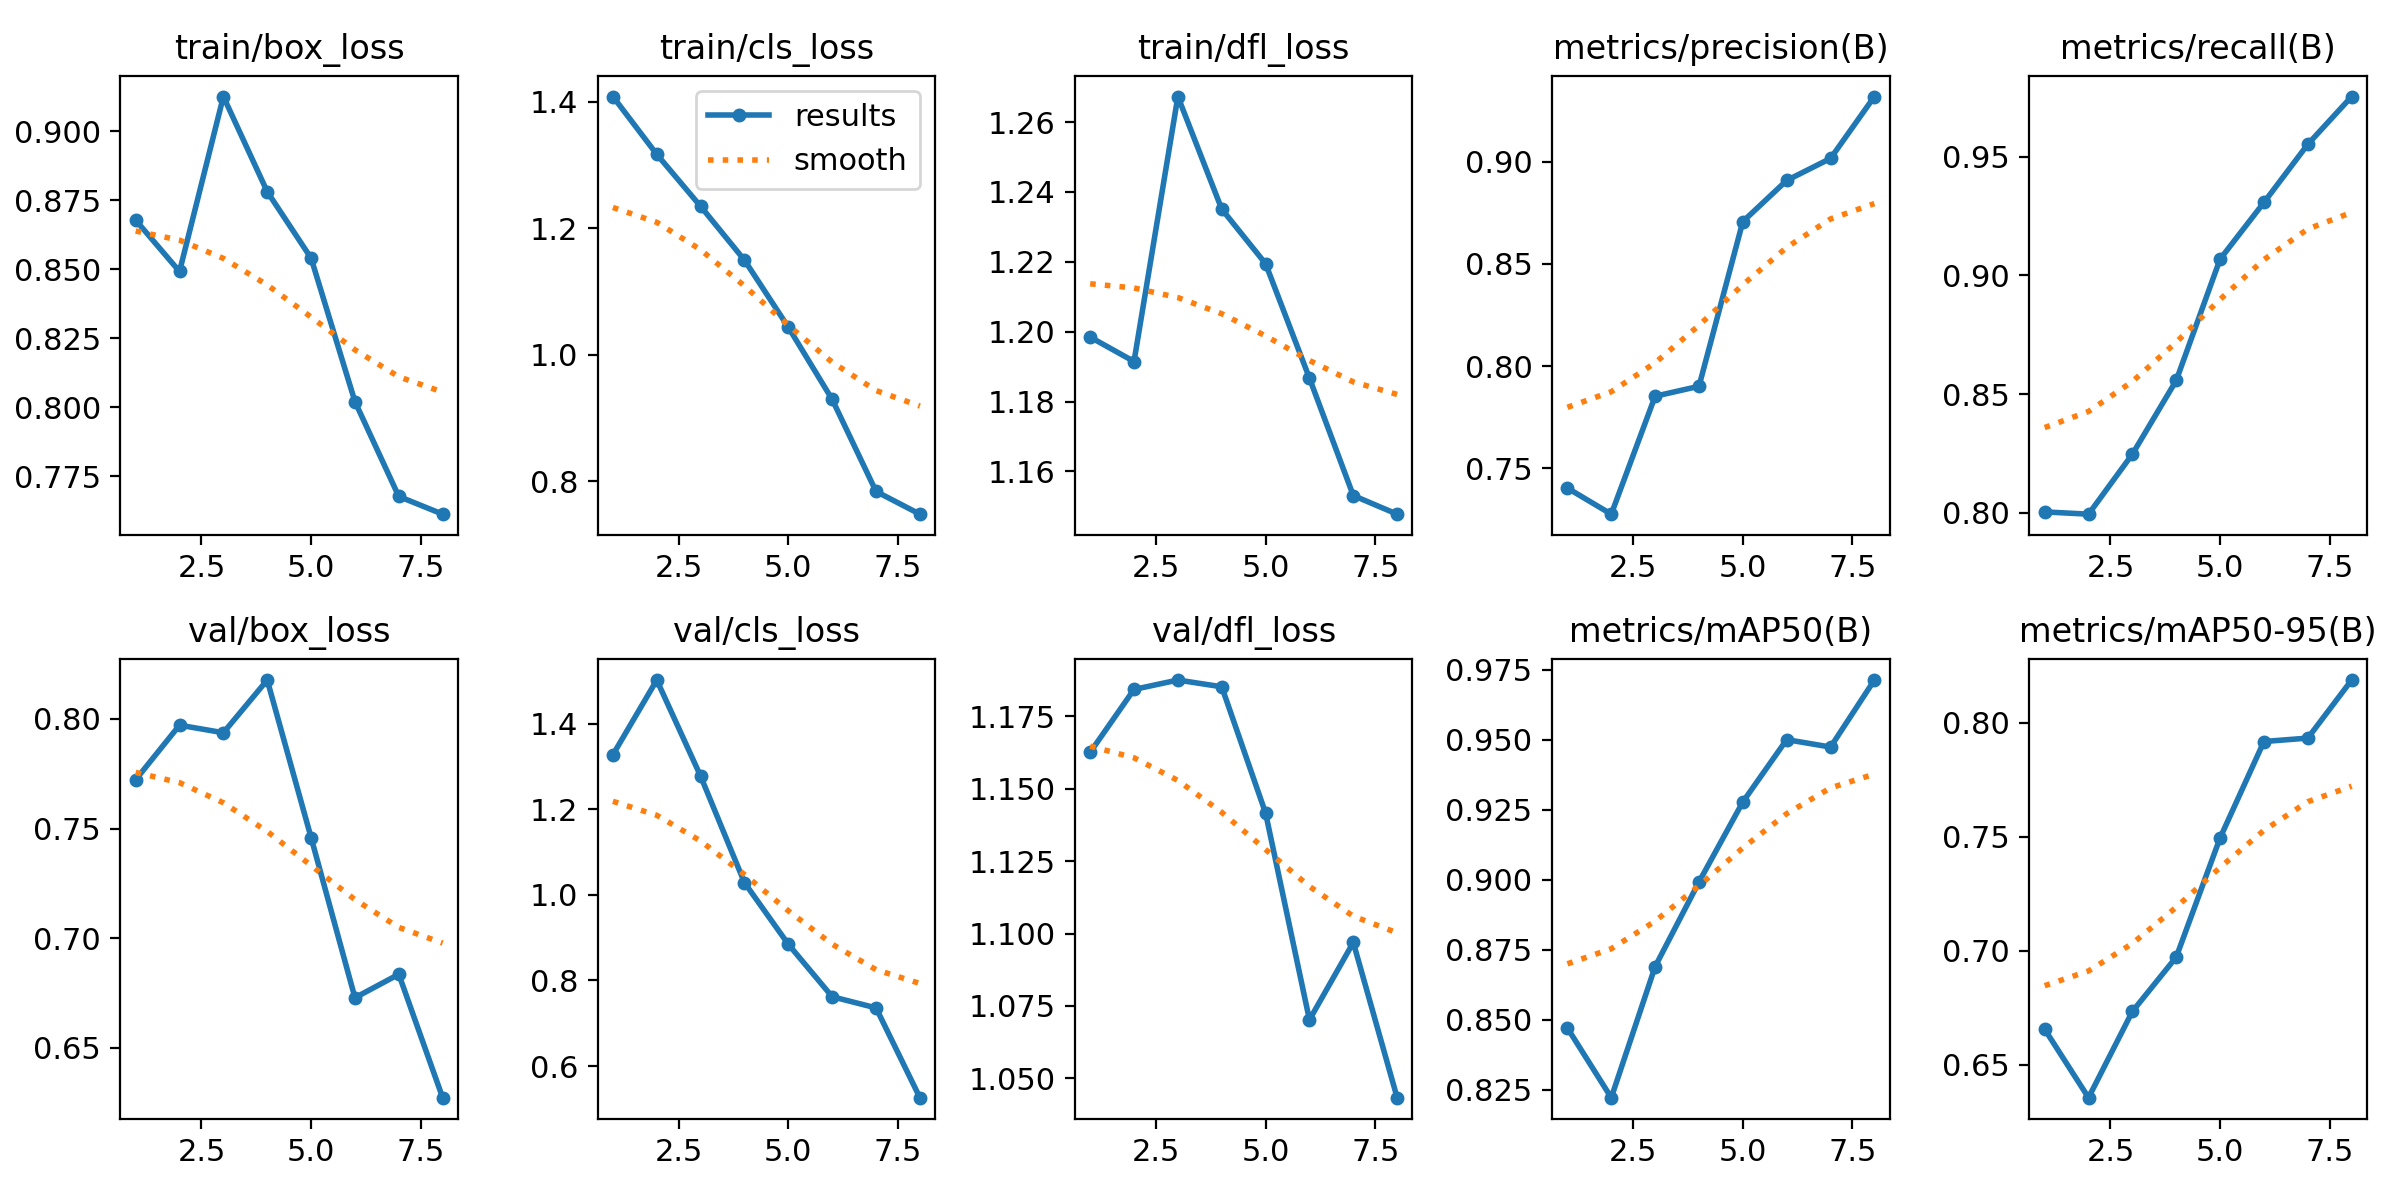

In [51]:
Image(filename='runs/detect/train12/results.png')

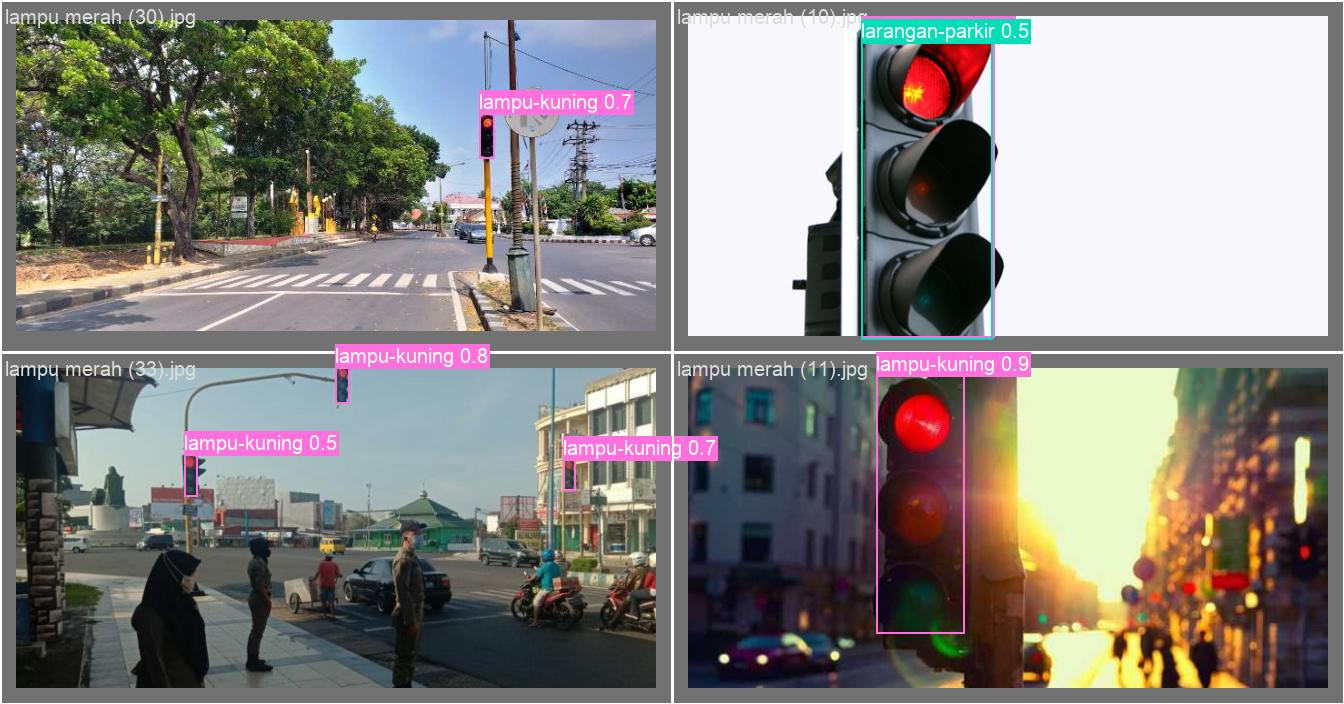

In [53]:
Image(filename=f'runs/detect/train12/val_batch0_pred.jpg', width=1024)

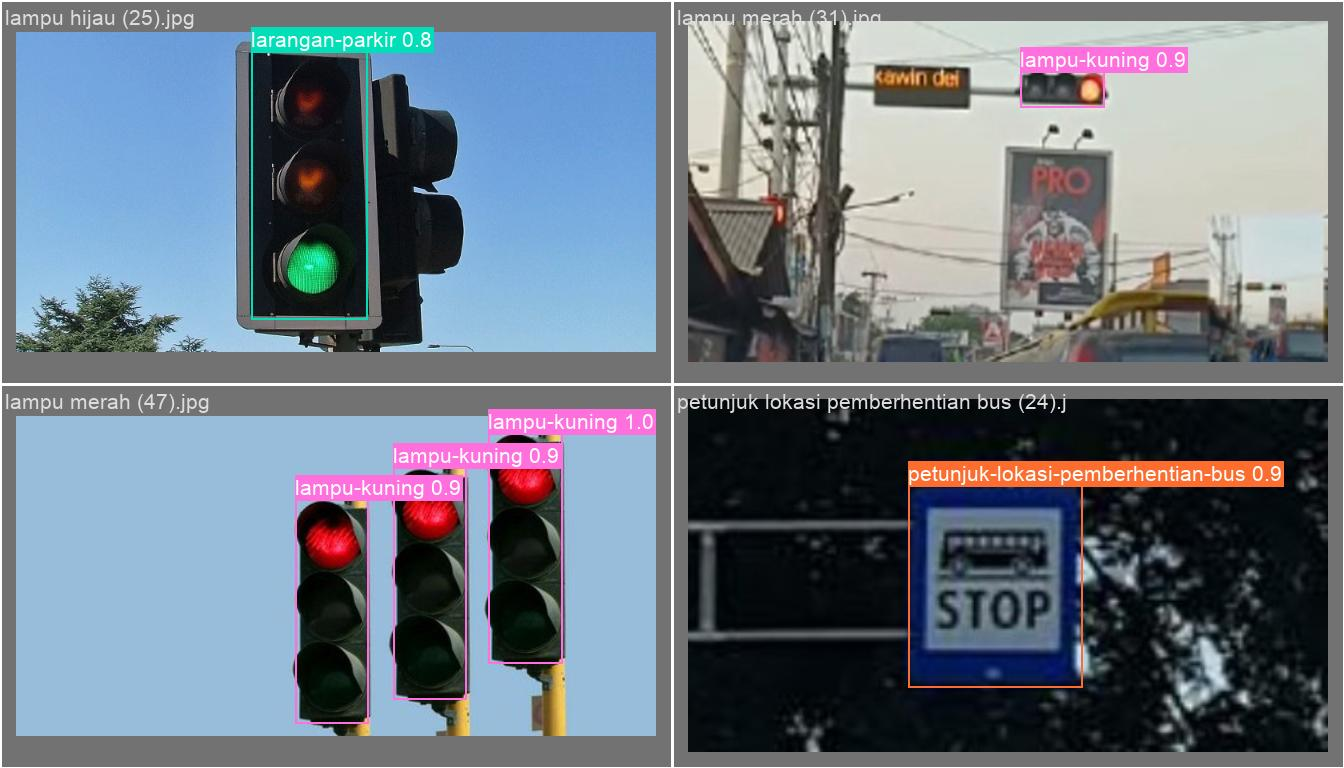

In [55]:
Image(filename=f'runs/detect/train12/val_batch1_pred.jpg', width=1024)

### 7. Calculate mAP with Test Dataset for Auto and batch 100


In [ ]:
%cd "."
model = YOLO("runs/detect/train12/weights/best.pt")
# Run validation on a set specified as 'val' argument
metrics = model.val(data='./dataset.yaml')


In [ ]:
metrics.results_dict